# TO EXPLORE SUPERVISED MACHINE LEARNING

## DEEPALI SANDIMANI

## **Simple Linear Regression**
  
###  In this regression task we will predict the percentage of marks that a student is expected to score based upon             the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### DataSet Used:http://bit.ly/W-data

## IMPORTING NECESSSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## READING THE DATA

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")



Data imported successfully


## GETTING OVERVIEW OF THE DATAFRAME AND BASIC INFORMATION

In [3]:
data.shape   # To Get The Size of Data

(25, 2)

In [4]:
data.head(10) 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Returns The Basic Information Of The Data Such As Datatypes And Total No Of entreies:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# describe Method to generate statstical summary of the Data:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## VISUALIZATION OF THE DATA

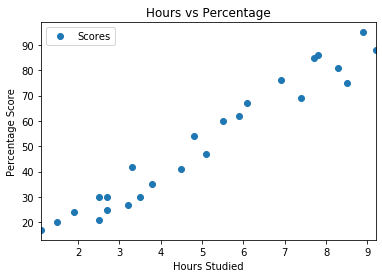

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).


In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [9]:
#Splitting The Data Into Training And Testing The Data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


## TRAINING THE ALGORITHM

We have our training and testing sets. Now its the time for training the model.

In [10]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(X_train,y_train)
print('Training completed')

Training completed


In [11]:
# Genertaint The Coefficents of the Regression Line:
m=r.coef_
c=r.intercept_
print('The Line Is:y=' ,m,'X','+',c)

The Line Is:y= [9.91065648] X + 2.018160041434683


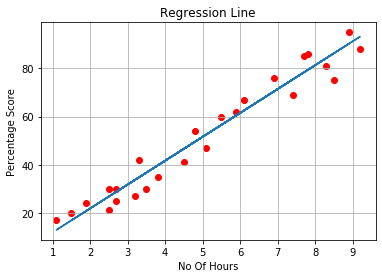

In [12]:
# To Plot The Regression Line:
y_line=m*X+c
plt.scatter(X,y,color='r')
plt.grid()
plt.plot(X,y_line)
plt.title('Regression Line')
plt.xlabel('No Of Hours')
plt.ylabel('Percentage Score')
plt.show()

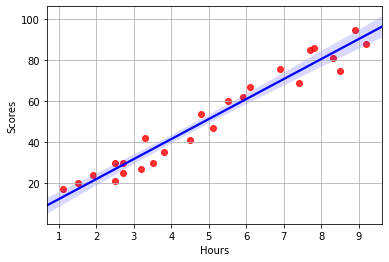

In [13]:
# To Plot Regression Line Using Seaborn Library:
import seaborn as sns
sns.regplot('Hours','Scores', data=data,color='red',line_kws={'color':'blue'})
plt.grid()

## TESTING THE DATA

In [14]:
y_predicted=r.predict(X_test)

In [16]:
test_data=pd.DataFrame(np.c_[X_test,y_test,y_predicted],columns=['Hours Studied','Actual Marks','Predicted Marks'])
test_data

,Hours Studied,Actual Marks,Predicted Marks
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [19]:
## To predict the marks when student studies 9.25 Hours:
hours=9.25
own_pred=r.predict([[hours]])

In [20]:
print('No. Of Hours Studied:',hours)
print('Percentage Obtained:',own_pred[0],'%')

No. Of Hours Studied: 9.25
Percentage Obtained: 93.69173248737538 %


## MODEL EVALUATION

In [21]:
from sklearn import metrics

In [22]:
# Training Score
print(r.score(X_train,y_train))

0.9515510725211553


In [25]:
# Testing Score
print(r.score(X_test,y_test))

0.9454906892105356


In [26]:
# To Get The Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predicted))

Mean Absolute Error: 4.183859899002975


## RESULTS:
    If the student studies for 9.25 hours he may get 93.69%
    MAE:4.183859899002975
    Test Accuracy:94.549%